In [66]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
import warnings
warnings.filterwarnings('ignore')

In [67]:
df=pd.read_csv('Airbnb NYC 2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Data Description
1. Id : Unique for each Propety Listing. 
2. name : Name of the each Propety Listing.
3. host_id : Unique ID for host who have listed the property on Airbnb.
4. host_name : Name of host
5. neighbourhood_group : Name of Each boroughs of NYC, Manhattan, Brooklyn,Queens, Bronx, State Island.
6. neighbourhood : Area in each borough of NYC 
7. latitude, longitude : Co-ordinates of each listed property
8. room_type : Differnt types of room available for listing, Private room, Entire home/apt, Shared room. 
9. price: Price of listing.
10. minimum_nigths : Mandatory number of nights to be booked for available for each type of property. 
11. number_of_review: Number of reviews for each Listed property 
12. last_review : Date on whih last time the listing was reviewed 
13. review_per_month : Number of reviews per month
14. calulated_host_listings_count: Numer of listing each host owns 
15. availablity_365: Number of days given listing is available for booking

In [68]:
df_original=df

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [70]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [71]:
df.drop(['id','last_review','name'],axis=1, inplace=True)

In [72]:

df['host_name'].replace(np.nan,'Other',inplace=True)
df['reviews_per_month'].replace(np.nan,'0',inplace=True)

In [73]:
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [74]:
hostname=df.host_name.value_counts().index
hostvalues=df.host_name.value_counts().values

### Observation
Top 10 moar frequent host name in the data is Michael         417
David,Sonder (NYC),John,Alex,Blueground,Sarah, Daniel,Jessica and Marie

Text(0.5, 1.0, 'Top 10 most frequent host ')

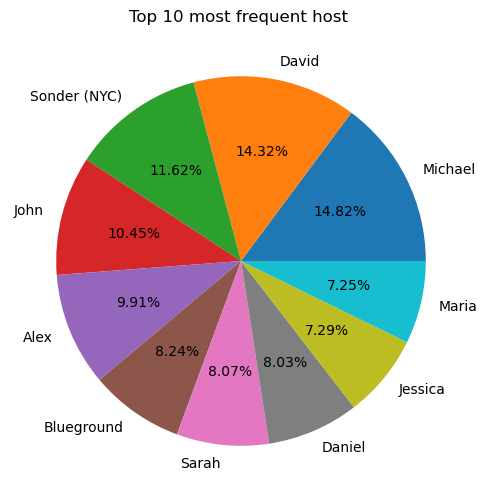

In [75]:
plt.pie(hostvalues[:10],labels=hostname[:10],autopct="%1.2f%%")
plt.title('Top 10 most frequent host ')

Text(0.5, 1.0, 'Neighbourhood Group')

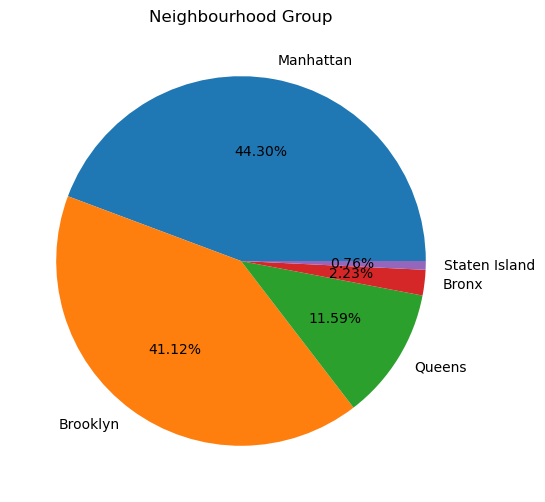

In [76]:
df.neighbourhood_group.value_counts()
plt.pie(df.neighbourhood_group.value_counts().values,labels=df.neighbourhood_group.value_counts().index,autopct="%1.2f%%")
plt.title('Neighbourhood Group')

In [77]:
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

### Observation
1. Almost 85% booking are done in Manhatten and Brooklyn 
2. Manhattan,Brooklyn,Queens,Bronx ,Staten Island are all possible neighbours 


In [78]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [79]:
q1 ,q3= np.percentile(df.price,[25,75], interpolation= 'midpoint')
IQR=q3- q1
max=q3+1.5*IQR
min=q1-1.5*IQR
IQR,min ,max

(106.0, -90.0, 334.0)

Text(0, 0.5, 'Density')

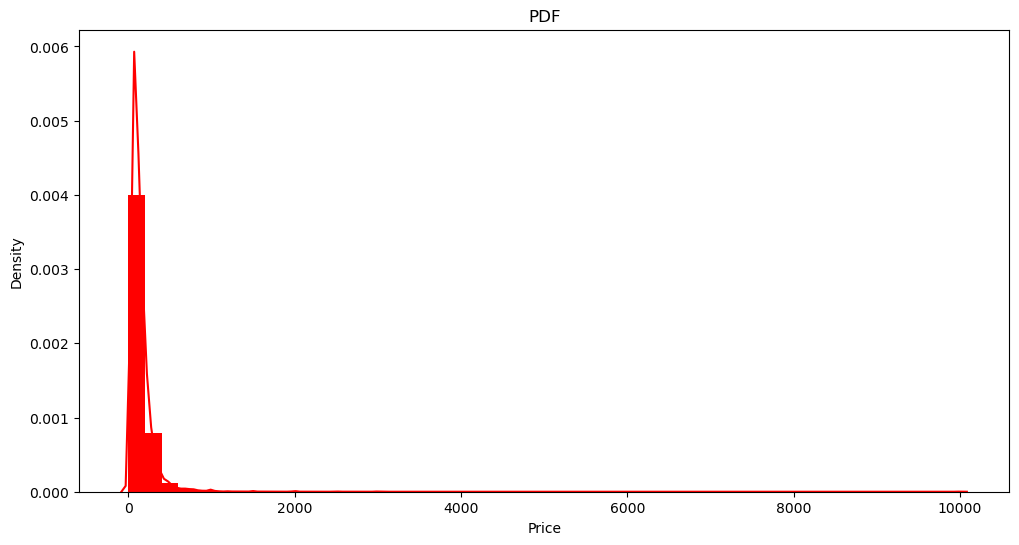

In [80]:
sns.distplot(df.price,color='red',hist_kws={"linewidth":15,'alpha':1})
plt.title('PDF')
plt.xlabel("Price")
plt.ylabel("Density")

In [81]:
(df.price>334).value_counts()

price
False    45923
True      2972
Name: count, dtype: int64

### Observation
2972 properties have cost higher that upper cap of box plot 
1. we can also conclude that you can easily find a property under $334 a day

In [82]:
# now we will remove outliers 
df_new=df[df.price<334]
df_new

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2


In [83]:
des=df_new.groupby(['neighbourhood_group']).price.describe()


In [91]:
data_mean = {
    'neighbourhood_group': ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
    'mean_price': [77.365421, 105.699614, 145.904620, 88.904437, 89.235616]
}
data_mean = pd.DataFrame(data_mean)

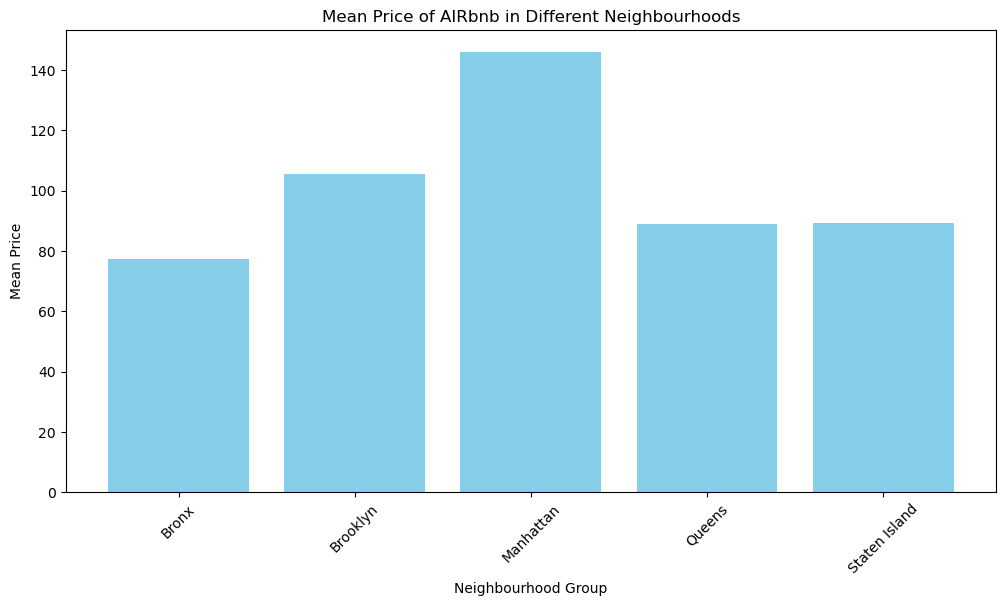

In [93]:
#plt.figure(figsize=(10, 6))
plt.bar(data_mean['neighbourhood_group'], data_mean['mean_price'], color='skyblue')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Mean Price')
plt.title('Mean Price of AIRbnb in Different Neighbourhoods')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

### Observation 
Manhatten is a expensive as compares to others

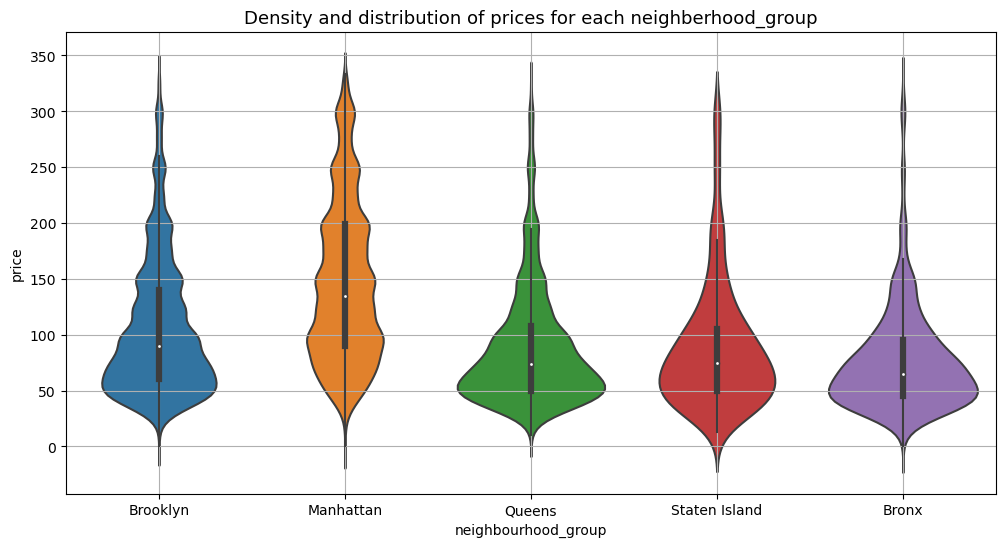

In [95]:
sns.violinplot(data = df_new, x = df_new['neighbourhood_group'], y = df_new['price']) 
plt.title('Density and distribution of prices for each neighberhood_group', fontsize = 13)
plt.grid()

Text(0.5, 1.0, 'Bronx')

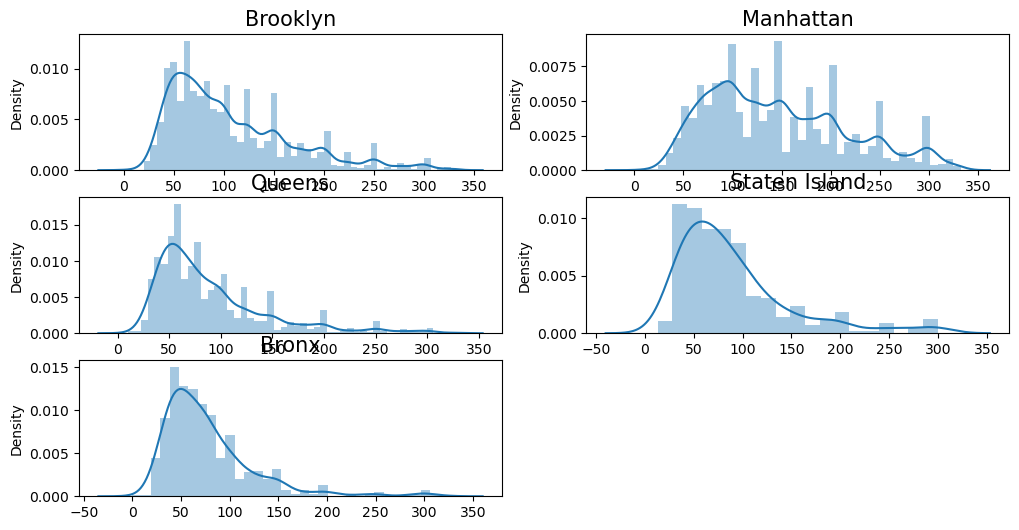

In [96]:
plt.subplot(3,2,1)
n1 = df_new[df_new['neighbourhood_group'] == 'Brooklyn']
sns.distplot(x = n1['price'])
plt.title("Brooklyn", fontsize = 15)

plt.subplot(3,2,2)
n2 = df_new[df_new['neighbourhood_group'] == 'Manhattan']
sns.distplot(x = n2['price'])
plt.title("Manhattan", fontsize = 15)

plt.subplot(3,2,3)
n3 = df_new[df_new['neighbourhood_group'] == 'Queens']
sns.distplot(x = n3['price'])
plt.title("Queens", fontsize = 15)

plt.subplot(3,2,4)
n4 = df_new[df_new['neighbourhood_group'] == 'Staten Island']
sns.distplot(x = n4['price'])
plt.title("Staten Island", fontsize = 15)

plt.subplot(3,2,5)
n5 = df_new[df_new['neighbourhood_group'] == 'Bronx']
sns.distplot(x = n5['price'])
plt.title("Bronx", fontsize = 15)

### Observations 
1. we can observe that state that Manhattan has the highest range of prices for the listings with 150 price as median observation, followed by Brooklyn with 90 per night.

2. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them

In [98]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

Text(0.5, 1.0, 'room Types')

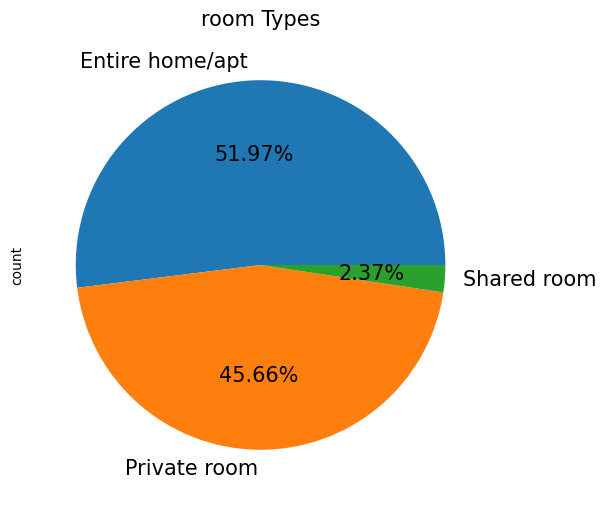

In [100]:
df.room_type.value_counts().plot(kind='pie',fontsize=15,autopct="%1.2f%%")
plt.title("room Types",fontsize=15)

### Observation 
1. most people prefer to rent a private space either emtire home/apartment or a proivate room
2. Out of which mostly they prefer entire appartment 

In [103]:
df.groupby(['room_type']).price.mean().reset_index()

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


Text(0, 0.5, 'mean')

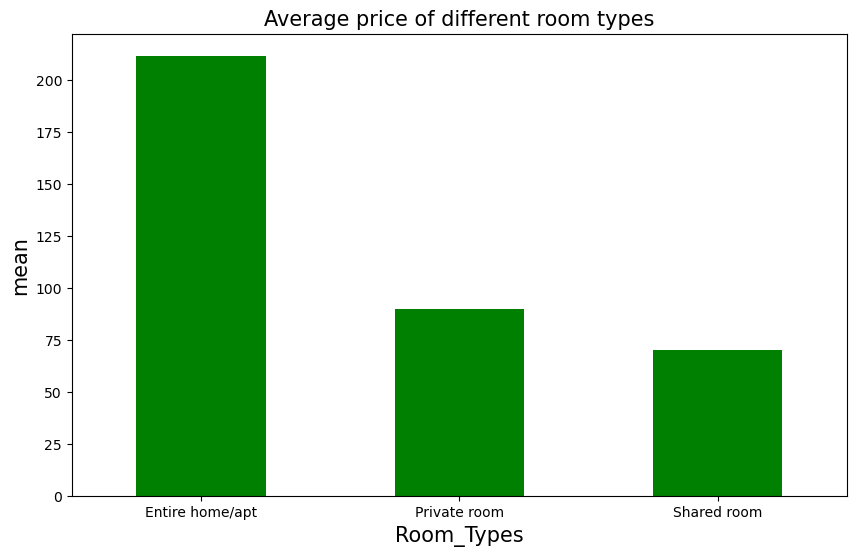

In [104]:
df.groupby(['room_type']).price.mean().plot(kind='bar',figsize=(10,6),color='green')
plt.xticks( rotation = 360) 
plt.title("Average price of different room types", fontsize = 15) 
plt.xlabel('Room_Types', fontsize = 15) 
plt.ylabel('mean', fontsize = 15) 

### Observation 
1. genrally renting entire house/appartment cost more that other options 

In [107]:
df.groupby(['room_type']).price.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25409.0,211.794246,284.041611,0.0,120.0,160.0,229.0,10000.0
Private room,22326.0,89.780973,160.205262,0.0,50.0,70.0,95.0,10000.0
Shared room,1160.0,70.127586,101.725252,0.0,33.0,45.0,75.0,1800.0


Text(0.5, 1.0, 'Shared room')

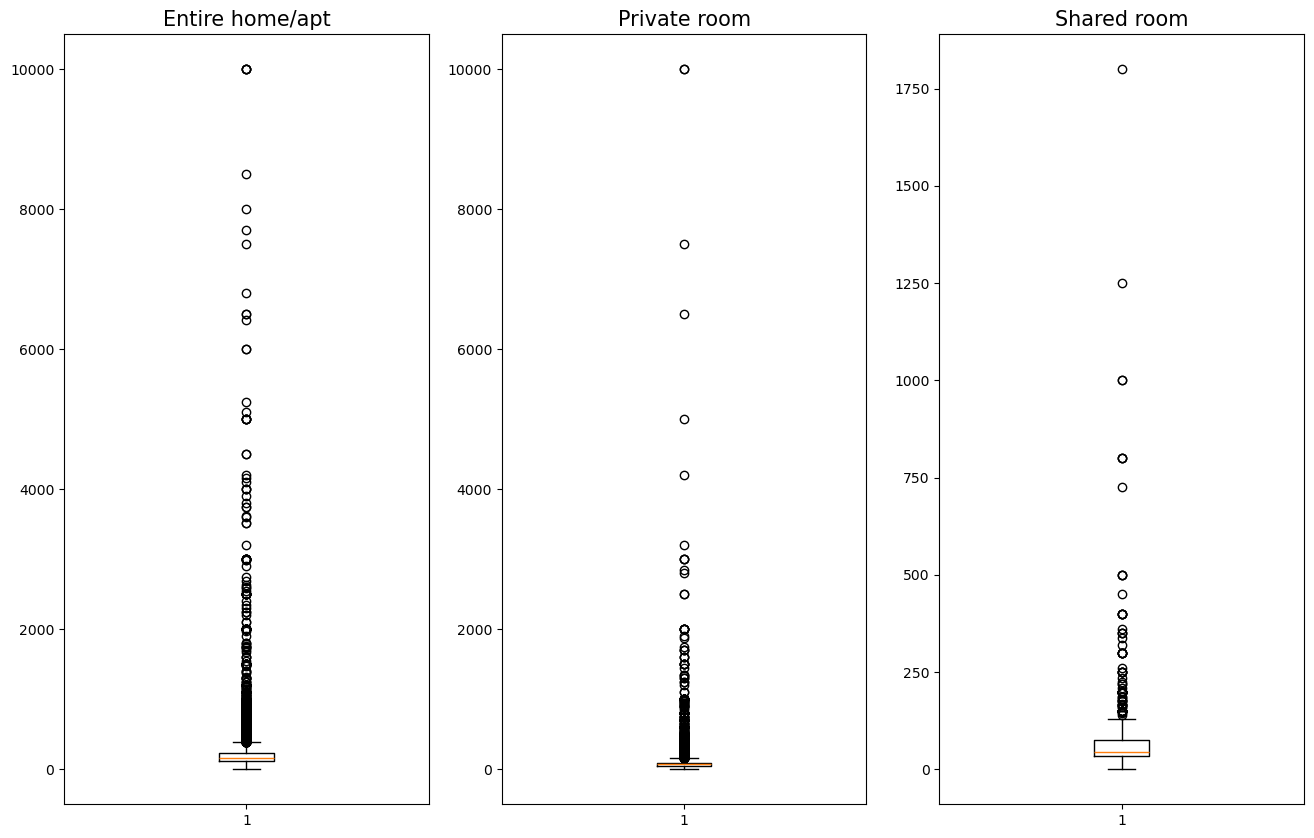

In [108]:
plt.figure(figsize = (16,10))

plt.subplot(1,3,1) 
entire = df[df['room_type'] == 'Entire home/apt'] 
plt.boxplot(x = entire['price']) 
plt.title("Entire home/apt", fontsize = 15)

plt.subplot(1,3,2) 
private = df[df['room_type'] == 'Private room'] 
plt.boxplot(x = private['price']) 
plt.title("Private room", fontsize = 15)

plt.subplot(1,3,3) 
shared = df[df['room_type'] == 'Shared room'] 
plt.boxplot(x = shared['price']) 
plt.title("Shared room", fontsize = 15)


### Observation 
1. As we can see from the boxplot, the room type Entire home/apt has highest price going upto 10000 dollars, also it has a lot of outliers which means that the average price would be higher compared to the other two.

2. On the other hand, Private room has less outliers compared to the entire home/apt but the price also goes upto 10000 dollars. But, it has the avergae price of 90 dollar approximately.

3. Shared room is the least preffered room type and it also reflect to the the mean price and outliers. The maximum price of the shared room is only 1000 dollars and has the average price revolving around 70 dollar.

### Mininmun night for room type 

In [109]:
round(df.groupby(['room_type']).minimum_nights.mean().reset_index(),0)

,room_type,minimum_nights
0,Entire home/apt,9.0
1,Private room,5.0
2,Shared room,6.0


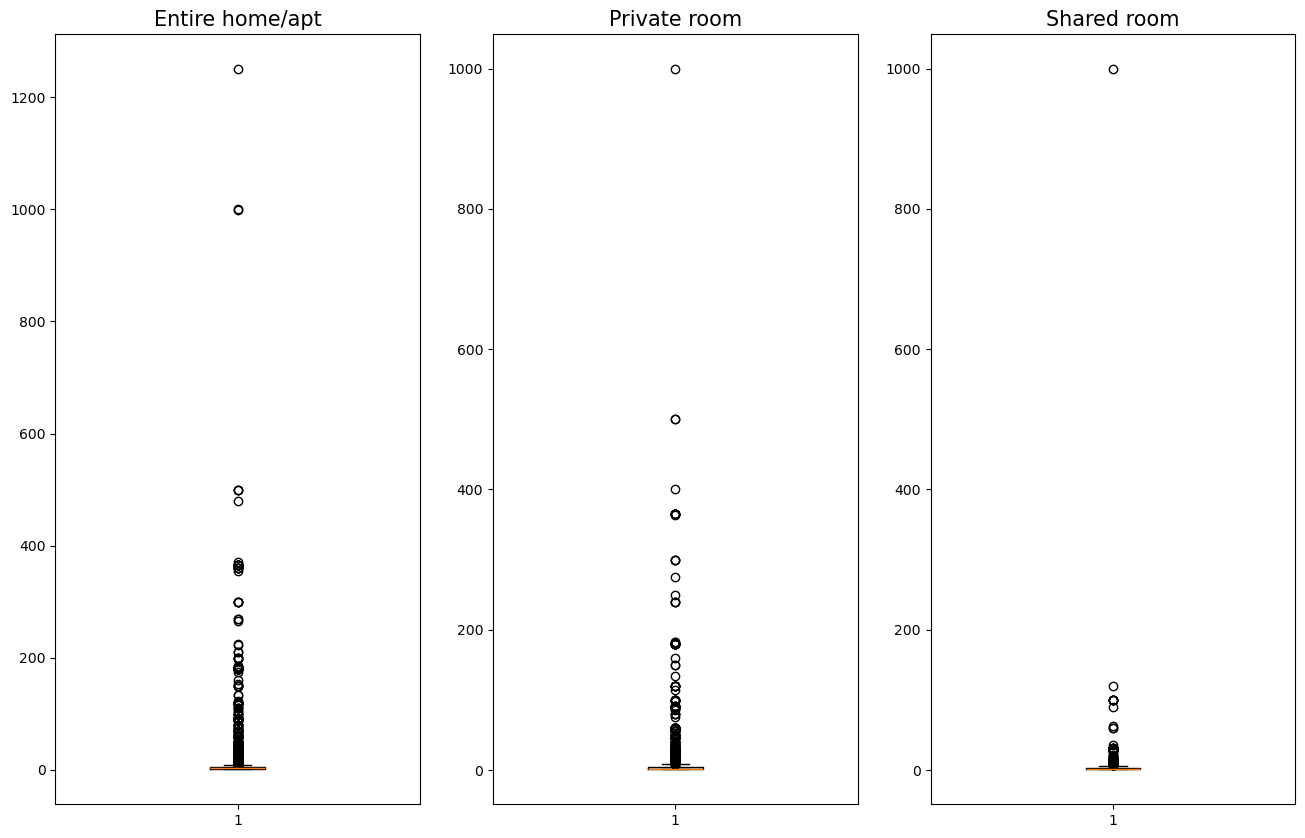

In [110]:
plt.figure(figsize = (16,10))

plt.subplot(1,3,1) 
entire1 = df[df['room_type'] == 'Entire home/apt'] 
plt.boxplot(x = entire1['minimum_nights']) 
plt.title("Entire home/apt", fontsize = 15)

plt.subplot(1,3,2) 
private1 = df[df['room_type'] == 'Private room'] 
plt.boxplot(x = private1['minimum_nights']) 
plt.title("Private room", fontsize = 15)

plt.subplot(1,3,3) 
shared1 = df[df['room_type'] == 'Shared room'] 
plt.boxplot(x = shared1['minimum_nights'])
plt.title("Shared room", fontsize = 15)

plt.show()

### Observation
1. According to the data, he mimimum days to stays in entire home/apt is 9 days, also it has maximum price.

2. The minimum days to stay for private room 5 days.

3. The minimum days to stay for shared room is 6 days.

In [114]:
df['availability_365'].value_counts().iloc[:10].sort_index()

availability_365
0      17533
1        408
2        270
3        306
5        340
89       361
90       290
179      301
364      491
365     1295
Name: count, dtype: int64

Text(0.5, 1.0, 'Availability 365')

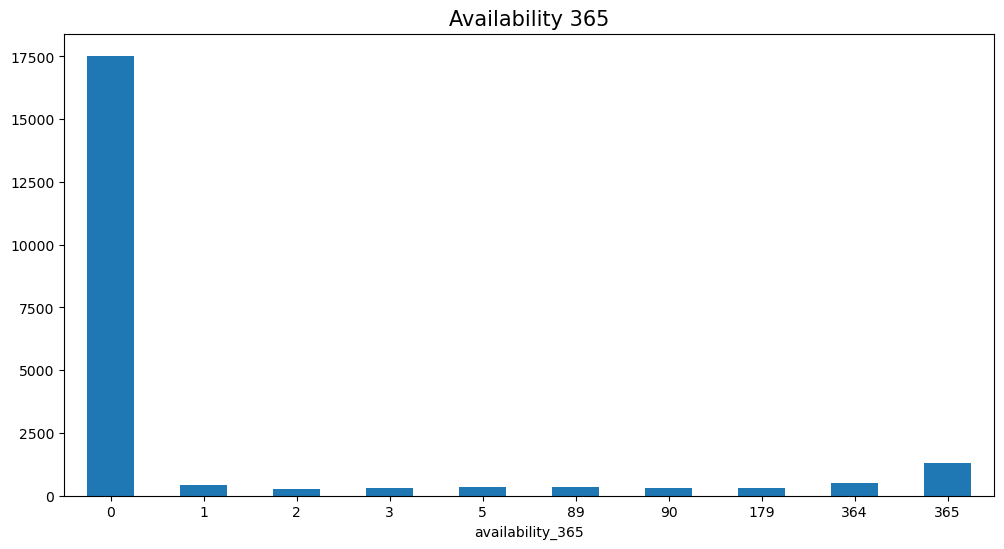

In [115]:
df['availability_365'].value_counts().iloc[:10].sort_index().plot(kind = 'bar')
plt.xticks(rotation = 360) 
plt.title('Availability 365', fontsize = 15)

### Observation 
1. It looks like, the neighbourhood group Manhatten has the highest Entire home amongst all othergroups.

2. but Brooklyn has the most number iof private rooms.

3. Manhatten and Brooklyn has almost same number of Shared room.

In [120]:
df.neighbourhood.value_counts().iloc[:10]
df.neighbourhood.value_counts().tail(10)

neighbourhood
Howland Hook       2
Lighthouse Hill    2
Silver Lake        2
West Farms         2
Woodrow            1
Fort Wadsworth     1
Richmondtown       1
New Dorp           1
Rossville          1
Willowbrook        1
Name: count, dtype: int64

Text(0.5, 1.0, 'Bottom 10 Neighbourhood')

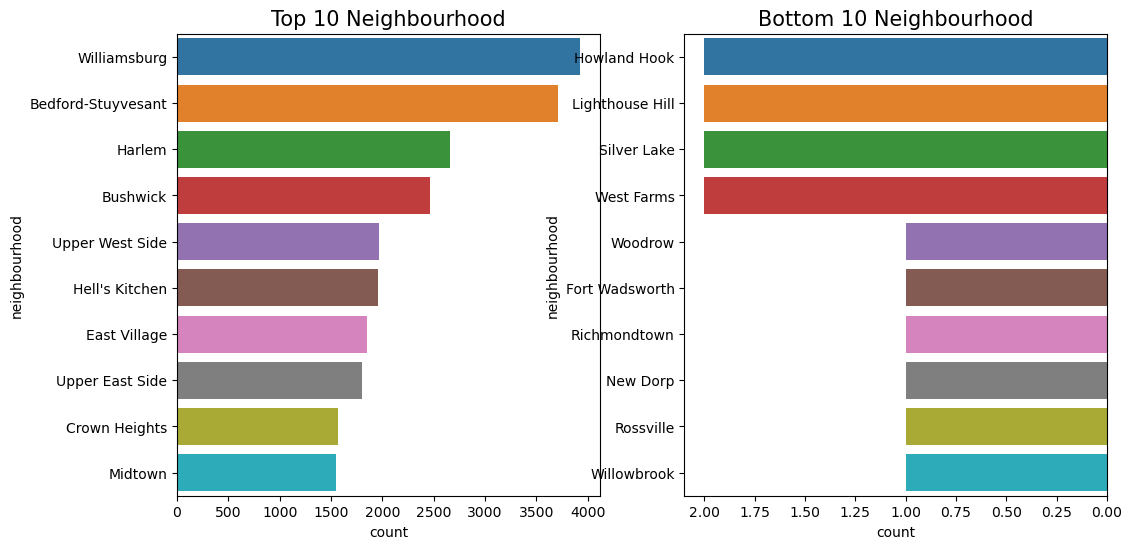

In [121]:
plt.subplot(1,2,1) 
sns.barplot(data = df, y = df['neighbourhood'].value_counts().iloc[:10].keys(), x = df['neighbourhood'].value_counts().iloc[:10]) 
plt.title("Top 10 Neighbourhood", fontsize = 15) 
plt.subplot(1,2,2) 
sns.barplot(data = df, y = df['neighbourhood'].value_counts().tail(10).keys(), x = df['neighbourhood'].value_counts().tail(10)).invert_xaxis() 
plt.title("Bottom 10 Neighbourhood", fontsize = 15)

### Observation 
1. Williamsburg and Bedford - Stuyvesant are the two highest Neighbourhood

2. willowbrook, Rossville, New Dorp, Richmondtown and woodrow are the least of the neighbourhood.

### Conclusion 
This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to dive deep into each significant column presented.

To begin, firstly, we identified the data of top ten host_id and we figured out that top host ID has 327 listings.

Secondly, we take "Neighbourhood_Group", and we found that Airbnb listings in New York City are concentrated in five neighborhoods: "Brooklyn," "Manhattan," "Queens," "Staten Island," and "Bronx". Moreover, we also learned from this chart that "Manhattan" and "Brooklyn" have the most hotel properties. Then, we found that Manhattan is the most expensive as the rental charges are more evenly distributed across all the price ranges, median price in Manhattan is approx $150 thats around double the median price of Bronx and the distributions in Queens and Staten Island appear to be very similar, while the Bronx appears to be the cheapest of the three.

Thirdly, we take the data of "room_type" and figured out that it is devided into three subcategaries and we can observe that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room. Futhermore, entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.

Fourthly, we put our latitude and longitude columns to good use by creating a geographical map of Newyork city which represents the location of all the areas with their latitude and longtitude. In other map is Colorcoded for listing price of room as per the location.

In addition, we returned to the first column "name" and found out the words from the hotel names, as well as the count for the most frequently used words by hosts. Hosts prefer to use Private rooms,brooklyn,central park,modern,nyc and Beautiful these words in their listing to seek customer attention.

Finally, we looked for the listings with the "most reviews". Count the rating of top ten reviewed hotels, and found out The top 10 most reviewed listings on Airbnb for NYC have an average price of $65 per night, with the majority of them under 50, and 9/10 of them are "Private Room" types, with the top reviewed listing having 629 reviews.